# 3. Machine Learning

# **<u> Aprendizaje Automático  </u>**

In [17]:
pip install varname


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from varname import nameof
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [19]:
variables_numericas = ['Age', 'StudyTimeWeekly', 'Absences']
df_numericas = df[variables_numericas]

def identificar_outliers(df, col_categorica, col_cuantitativa):
  outliers = pd.DataFrame() 
  
  for categoria in df[col_categorica].unique(): 
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa] 
    Q1 = data_categoria.quantile(0.25) 
    Q3 = data_categoria.quantile(0.75) 
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR 
    limite_superior = Q3 + 1.5 * IQR 
    outliers_categoria = data_categoria[(data_categoria < limite_inferior) | (data_categoria > limite_superior)] 
    outliers = pd.concat([outliers, outliers_categoria]) 
  return outliers 

outliers = identificar_outliers(df, 'GradeClass', 'Absences') 
print(f"Outliers identificados:\n{outliers}")

indices_outliers = outliers.index
df = df.drop(indices_outliers)

Outliers identificados:
      Absences
2182      25.0
2192      28.0
2225      23.0
2226      28.0
2247      25.0
...        ...
2294      28.0
2299      24.0
2309      21.0
2337      22.0
2375      24.0

[73 rows x 1 columns]


### **Métodos de transformación y escalado**

La preparación de datos para algoritmos de machine learning es un paso importante para asegurar la fiabilidad de los modelos y aumentar su calidad.

Para llevar a cabo la transformación y escalado existen diversos métodos y es fundamental comprender cuándo y como utilizarlos. Debido a la naturaleza de los datos de estudiados, el metodo a usar será el StandardScaler.

* Escala los datos para que tengan una media de 0 y una desviación estandar de 1.
* Se utiliza para centrar y escalar los valores
* Se usa cuando los datos se distribuyen normalmente
* Para algoritmos sensibles a la escala de los datos, como regresión lineal, regresión logística, SVM, y redes neuronales

## **<u> Regresión (Predecir un número cuantitativo - entero / continuo) </u>**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

In [21]:
# Uso del StandardScaler en las columnas numericas

scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
df_standard

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,-1.724752,0.478643,0.976558,-0.853452,0.245816,1.780400,-0.872110,1.523926,-0.106747,-0.790625,-0.658891,2.015768,-0.432902,1.101237,-0.851112
1,-1.723267,1.367334,-1.024005,-0.853452,-0.750771,0.996663,-1.701021,-0.656200,-0.997201,-0.790625,-0.658891,-0.496089,-0.432902,1.225776,-1.678671
2,-1.721781,-1.298737,-1.024005,1.088800,1.242403,-0.986727,1.377790,-0.656200,-0.106747,-0.790625,-0.658891,-0.496089,-0.432902,-1.983329,0.804006
3,-1.720296,0.478643,0.976558,-0.853452,1.242403,0.043786,-0.043200,-0.656200,0.783707,1.264822,-0.658891,-0.496089,-0.432902,0.143014,-0.023553
4,-1.718811,0.478643,0.976558,-0.853452,0.245816,-0.904912,0.312048,1.523926,0.783707,-0.790625,-0.658891,-0.496089,-0.432902,-0.696036,0.804006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,1.814396,-0.410047,0.976558,1.088800,0.245816,0.346227,0.430464,1.523926,1.674162,-0.790625,-0.658891,-0.496089,-0.432902,-0.124398,-0.023553
2315,1.815882,-1.298737,0.976558,-0.853452,-0.750771,1.217497,-0.161615,1.523926,0.783707,-0.790625,1.517702,-0.496089,-0.432902,0.674042,0.804006
2316,1.818852,-0.410047,-1.024005,-0.853452,0.245816,0.714208,-0.043200,-0.656200,-0.106747,-0.790625,-0.658891,-0.496089,-0.432902,0.083729,0.804006
2317,1.820337,1.367334,0.976558,-0.853452,1.242403,0.159218,-1.464189,-0.656200,1.674162,1.264822,-0.658891,-0.496089,-0.432902,1.677625,-2.506231


In [22]:
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
df_minmax

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.000000,0.666667,1.0,0.000000,0.50,0.992773,0.241379,1.0,0.50,0.0,0.0,1.0,0.0,0.732299,0.50
1,0.000418,1.000000,0.0,0.000000,0.25,0.771270,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.760729,0.25
2,0.000836,0.000000,0.0,0.666667,0.75,0.210718,0.896552,0.0,0.50,0.0,0.0,0.0,0.0,0.028151,1.00
3,0.001255,0.666667,1.0,0.000000,0.75,0.501965,0.482759,0.0,0.75,1.0,0.0,0.0,0.0,0.513555,0.75
4,0.001673,0.666667,1.0,0.000000,0.50,0.233840,0.586207,1.0,0.75,0.0,0.0,0.0,0.0,0.322015,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,0.996654,0.333333,1.0,0.666667,0.50,0.587442,0.620690,1.0,1.00,0.0,0.0,0.0,0.0,0.452509,0.75
2315,0.997072,0.000000,1.0,0.000000,0.25,0.833683,0.448276,1.0,0.75,0.0,1.0,0.0,0.0,0.634778,1.00
2316,0.997909,0.333333,0.0,0.000000,0.50,0.691442,0.482759,0.0,0.50,0.0,0.0,0.0,0.0,0.500021,1.00
2317,0.998327,1.000000,1.0,0.000000,0.75,0.534589,0.068966,0.0,1.00,1.0,0.0,0.0,0.0,0.863877,0.00


In [23]:
def compare_models(model_dict):
    results = []

    for name, (mse, r2, mae, rmse, pred) in model_dict.items():
        stats = [name, mse, r2, mae, rmse, pred]
        results.append(stats)
    # df_results = pd.DataFrame(results, columns=['Modelo', 'Error Cuadrático Medio (MSE)', 'Coeficiente de Determinación (R^2)', 'Predicciones'])
    df_results = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'MAE', 'RMSE', 'Predicciones'])
    return df_results

def gen_graph(x, y_pred, x_name, y_name, title):
    plt.figure(figsize=(14,7))

    sns.scatterplot(data=df, x=x_name, y=y_name)
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')
    print(y_pred.dtype)

### Regresion Lineal

In [24]:
# Función de regresión lineal
def regresion_lineal_category(X_train, X_test, y_train, y_test, x_n, y_n, df_n):

    dir = str(f'./graph/1_regresion_lineal/{df_n}/')
    os.makedirs(dir, exist_ok=True)

    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)

    # Hacer predicciones para todos los valores de X
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns the RMSE

    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    # Añadir jitter a los datos binomiales
    jitter_strength = 0.02
    y_train_jitter = y_train + np.random.uniform(-jitter_strength, jitter_strength, y_train.shape)
    y_test_jitter = y_test + np.random.uniform(-jitter_strength, jitter_strength, y_test.shape)

    # Primer subgráfico: Datos de train
    ax[0].scatter(X_train, y_train_jitter, label='Datos de train', alpha=0.5)
    ax[0].plot(X_train, y_pred_train, color='red', label='Recta de regresión')
    ax[0].set_title(f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - train. DF: {df_n}')
    ax[0].set_xlabel(f'{x_n}')
    ax[0].set_ylabel(f'{y_n}')
    ax[0].legend()

    # Segundo subgráfico: Datos de test
    ax[1].scatter(X_train, y_train_jitter, label='Datos de train', alpha=0.5)
    ax[1].plot(X_train, y_pred_train, color='red', label='Recta de regresión')
    ax[1].set_title(f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - test. DF: {df_n}')
    ax[1].set_xlabel(f'{x_n}')
    ax[1].set_ylabel(f'{y_n}')
    ax[1].legend()

    plt.tight_layout()
    file = str(f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} DF: {df_n}.png')
    plt.savefig(dir + file)
    plt.show()
    
    return mse, r2, mae, rmse, y_pred_test


In [25]:
# Función de regresión lineal
def regresion_lineal_binomial(X_train, X_test, y_train, y_test, x_n, y_n, df_n):

    dir = str(f'./graph/1_regresion_lineal/{df_n}/')
    os.makedirs(dir, exist_ok=True)

    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)

    # Hacer predicciones para todos los valores de X
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns the RMSE

    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    # Crear función para gráficos de área apilada
    def stacked_area_plot(ax, X, y, y_pred, title):
        # Clasificar los datos según X
        sorted_indices = np.argsort(X, axis=0).flatten()
        X_sorted = X[sorted_indices]
        y_sorted = y[sorted_indices]

        # Calcular las proporciones de 0s y 1s en ventanas móviles
        window_size = 50
        proportions_0 = [np.mean(y_sorted[i:i+window_size] == 0) for i in range(len(y_sorted) - window_size)]
        proportions_1 = [np.mean(y_sorted[i:i+window_size] == 1) for i in range(len(y_sorted) - window_size)]
        X_windows = X_sorted[:len(X_sorted) - window_size]

        # Graficar las proporciones
        ax.fill_between(X_windows.flatten(), proportions_0, label=f'No {y_n}', alpha=0.5)
        ax.fill_between(X_windows.flatten(), proportions_1, label=f'{y_n}', alpha=0.5)

        # Graficar la recta de regresión
        ax.plot(X_sorted, y_pred[sorted_indices], color='red', label='Recta de regresión')
        ax.set_title(title)
        ax.set_xlabel(f'{x_n}')
        ax.set_ylabel(f'{y_n}')
        ax.legend()

    # Primer subgráfico: Datos de train
    stacked_area_plot(ax[0], X_train, y_train, y_pred_train, f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - train. DF: {df_n}')

    # Segundo subgráfico: Datos de test
    stacked_area_plot(ax[1], X_test, y_test, y_pred_test, f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - test. DF: {df_n}')

    plt.tight_layout()
    file = str(f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} DF: {df_n}.png')
    plt.savefig(dir + file)
    plt.show()
    
    return mse, r2, mae, rmse, y_pred_test

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# def regresion_lineal_politomica(X_train, X_test, y_train, y_test, x_n, y_n):
#     # Crear un modelo de regresión lineal
#     model = LinearRegression()

#     # Ajustar el modelo a los datos
#     model.fit(X_train, y_train)

#     # Hacer predicciones para todos los valores de X
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)

#     # Calcular métricas
#     mse = mean_squared_error(y_test, y_pred_test)
#     r2 = r2_score(y_test, y_pred_test)
#     mae = mean_absolute_error(y_test, y_pred_test)
#     rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns the RMSE

#     # Preparar datos para gráficos
#     train_data = np.concatenate([X_train, y_train.reshape(-1, 1)], axis=1)
#     test_data = np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1)
    
#     # Generar gráfico
#     fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

#     def boxplot_with_regression(ax, data, title):
#         X = data[:, 0].reshape(-1, 1)
#         y = data[:, 1]

#         # Graficar el gráfico de cajas
#         sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')

#         # Graficar la línea de regresión
#         ax.scatter(X.flatten(), y, color='black', alpha=0.5, label='Datos')
#         sorted_indices = np.argsort(X.flatten())
#         X_sorted = X[sorted_indices]
#         y_pred_sorted = model.predict(X_sorted)
#         ax.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Línea de Regresión')

#         # Configuración del gráfico
#         ax.set_title(title)
#         ax.set_xlabel(f'{x_n}')
#         ax.set_ylabel(f'{y_n}')
#         ax.legend()
#         ax.grid(True)

#     # Primer subgráfico: Datos de train
#     boxplot_with_regression(ax[0], train_data, f'Regresión Lineal - Train: {x_n} vs {y_n}')

#     # Segundo subgráfico: Datos de test
#     boxplot_with_regression(ax[1], test_data, f'Regresión Lineal - Test: {x_n} vs {y_n}')

#     plt.tight_layout()
#     plt.show()
    
#     return mse, r2, mae, rmse, y_pred_test

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def regresion_lineal_politomica(X_train, X_test, y_train, y_test, x_n, y_n, df_n):

    dir = str(f'./graph/1_regresion_lineal/{df_n}/')
    os.makedirs(dir, exist_ok=True)

    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)

    # Hacer predicciones para todos los valores de X
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns the RMSE

    # Preparar datos para gráficos
    train_data = np.concatenate([X_train, y_train.reshape(-1, 1)], axis=1)
    test_data = np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1)
    
    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    def boxplot_with_regression(ax, data, title):
        X = data[:, 0].reshape(-1, 1)
        y = data[:, 1]

        # Graficar el gráfico de cajas
        sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')

        # Graficar la línea de regresión
        sorted_indices = np.argsort(X.flatten())
        X_sorted = X[sorted_indices]
        y_pred_sorted = model.predict(X_sorted)
        ax.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Línea de Regresión')

        # Configuración del gráfico
        ax.set_title(title)
        ax.set_xlabel(f'{x_n}')
        ax.set_ylabel(f'{y_n}')
        ax.legend(title='Leyenda')
        ax.grid(True)

    # Primer subgráfico: Datos de train
    boxplot_with_regression(ax[0], train_data, f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - train. DF: {df_n}')

    # Segundo subgráfico: Datos de test
    boxplot_with_regression(ax[1], test_data, f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} - test. DF: {df_n}')

    plt.tight_layout()
    file = str(f'1. REGRESIÓN LINEAL Relación entre {x_n} y {y_n} DF: {df_n}.png')
    plt.savefig(dir + file)
    plt.show()
    
    return mse, r2, mae, rmse, y_pred_test

In [28]:
def regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n, df_n):
    if y_n == "Tutoring" or y_n == "Extracurricular" or y_n == "Sports" or y_n == "Music":
        return regresion_lineal_binomial(X_train, X_test, y_train, y_test, x_n, y_n, df_n)
    elif y_n == "ParentalSupport":
        return regresion_lineal_politomica(X_train, X_test, y_train, y_test, x_n, y_n, df_n)
    else:
        return regresion_lineal_category(X_train, X_test, y_train, y_test, x_n, y_n, df_n)

### Regresión Polinómica

In [29]:
def regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n):
    
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=15)  # Cambiar degree para ajustar la complejidad del modelo
    
    # Crear el modelo de regresión polinómica
    x_poly_train = poly.fit_transform(X_train)
    x_poly_test = poly.fit_transform(X_test)

    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(x_poly_train, y_train)

   # Hacer predicciones
    y_poly_pred_train = model.predict(x_poly_train)
    y_poly_pred_test = model.predict(x_poly_test)

    # Evaluar el modelo
    mse_poly = mean_squared_error(y_test, y_poly_pred_test)
    r2_poly = r2_score(y_test, y_poly_pred_test)
    mae_poly = mean_absolute_error(y_test, y_poly_pred_test)
    rmse_poly = mean_squared_error(y_test, y_poly_pred_test, squared=False)  # squared=False returns the RMSE

    # Obtenemos el valor mínimo y máximo de x
    x_min = X_train.min()
    x_max = X_train.max()

    # Creamos un rango de valores para x para dibujar la línea de regresión
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    title = 'Modelo de regresión polinómica para predecir los resultados'

    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    # Primer subgráfico: Datos de train
    ax[0].scatter(X_train, y_train, label='Datos de train')
    ax[0].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[0].set_title(f'2. REGRESIÓN POLINÓMICA Relación entre {x_n} y {y_n} - train')
    ax[0].set_xlabel(f'{x_n}')
    ax[0].set_ylabel(f'{y_n}')
    ax[0].legend()

    # Segundo subgráfico: Datos de test
    ax[1].scatter(X_test, y_test, color='green', label='Datos de test')
    ax[1].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[1].set_title(f'2. REGRESIÓN POLINÓMICA Relación entre {x_n} y {y_n} - test')
    ax[1].set_xlabel(f'{x_n}')
    ax[1].set_ylabel(f'{y_n}')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    return mse_poly, r2_poly, mae_poly, rmse_poly, y_poly_pred_test

### Red Neuronal

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def gen_graph_neuron(x_train, y_train, x_test, y_test, y_pred_train, y_pred_test, x_n, y_n, title, model):
    plt.figure(figsize=(20, 6))

    # Crear una figura con dos subgráficos
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  

    # Obtener los valores mínimo y máximo de x para la línea de predicción
    x_min = min(x_train.min(), x_test.min())
    x_max = max(x_train.max(), x_test.max())
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)

    # Normalizar el rango de x para las predicciones
    x_range_norm = (x_range - np.mean(x_train)) / np.std(x_train)

    # Realizar las predicciones para el rango de valores
    y_range_pred_norm = model.predict(x_range_norm)
    y_range_pred = y_range_pred_norm * np.std(y_train) + np.mean(y_train)

    # Primer subgráfico: Datos de entrenamiento
    ax[0].scatter(x_train, y_train, label='Datos de entrenamiento')
    ax[0].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[0].set_title(f'3. REGRESIÓN NEURONAL Modelo de red neuronal de {x_n} y {y_n} - Datos de training')
    ax[0].set_xlabel(x_n)
    ax[0].set_ylabel(y_n)
    ax[0].legend()

    # Segundo subgráfico: Datos de prueba
    ax[1].scatter(x_test, y_test, color='green', label='Datos de prueba')
    ax[1].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[1].set_title(f'3. REGRESIÓN NEURONAL Modelo de red neuronal de {x_n} y {y_n} - Datos de test')
    ax[1].set_xlabel(x_n)
    ax[1].set_ylabel(y_n)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

def regresion_neuronal(x, y, x_n, y_n):
    # Convertir las Series a numpy arrays y asegurarse de que sean vectores columna
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    
    # Normalizar los datos de entrada
    x_mean = np.mean(x)
    x_std = np.std(x)
    y_mean = np.mean(y)
    y_std = np.std(y)

    x_norm = (x - x_mean) / x_std
    y_norm = (y - y_mean) / y_std

    # Dividir los datos en conjunto de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=42)

    # Crear el modelo de la red neuronal
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

    # Hacer predicciones en los datos normalizados
    y_pred_train_norm = model.predict(x_train)
    y_pred_test_norm = model.predict(x_test)
    y_pred_all_norm = model.predict(x_norm)

    # Desnormalizar las predicciones
    y_pred_train = y_pred_train_norm * y_std + y_mean
    y_pred_test = y_pred_test_norm * y_std + y_mean
    y_pred_all = y_pred_all_norm * y_std + y_mean

    # Desnormalizar los datos de prueba y entrenamiento para la visualización
    x_train_orig = x_train * x_std + x_mean
    x_test_orig = x_test * x_std + x_mean
    x_all_orig = x_norm * x_std + x_mean

    y_train_orig = y_train * y_std + y_mean
    y_test_orig = y_test * y_std + y_mean
    y_all_orig = y_norm * y_std + y_mean

    # Evaluar el modelo
    mse = mean_squared_error(y_all_orig, y_pred_all)
    r2 = r2_score(y_all_orig, y_pred_all)
    mae = mean_absolute_error(y_all_orig, y_pred_all)
    rmse = mean_squared_error(y_all_orig, y_pred_all, squared=False)

    # Generar gráficos para datos de entrenamiento y prueba
    gen_graph_neuron(x_train_orig, y_train_orig, x_test_orig, y_test_orig, y_pred_train, y_pred_test, x_n, y_n, 'Modelo de red neuronal', model)

    return mse, r2, mae, rmse, y_pred_all


## MAIN

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


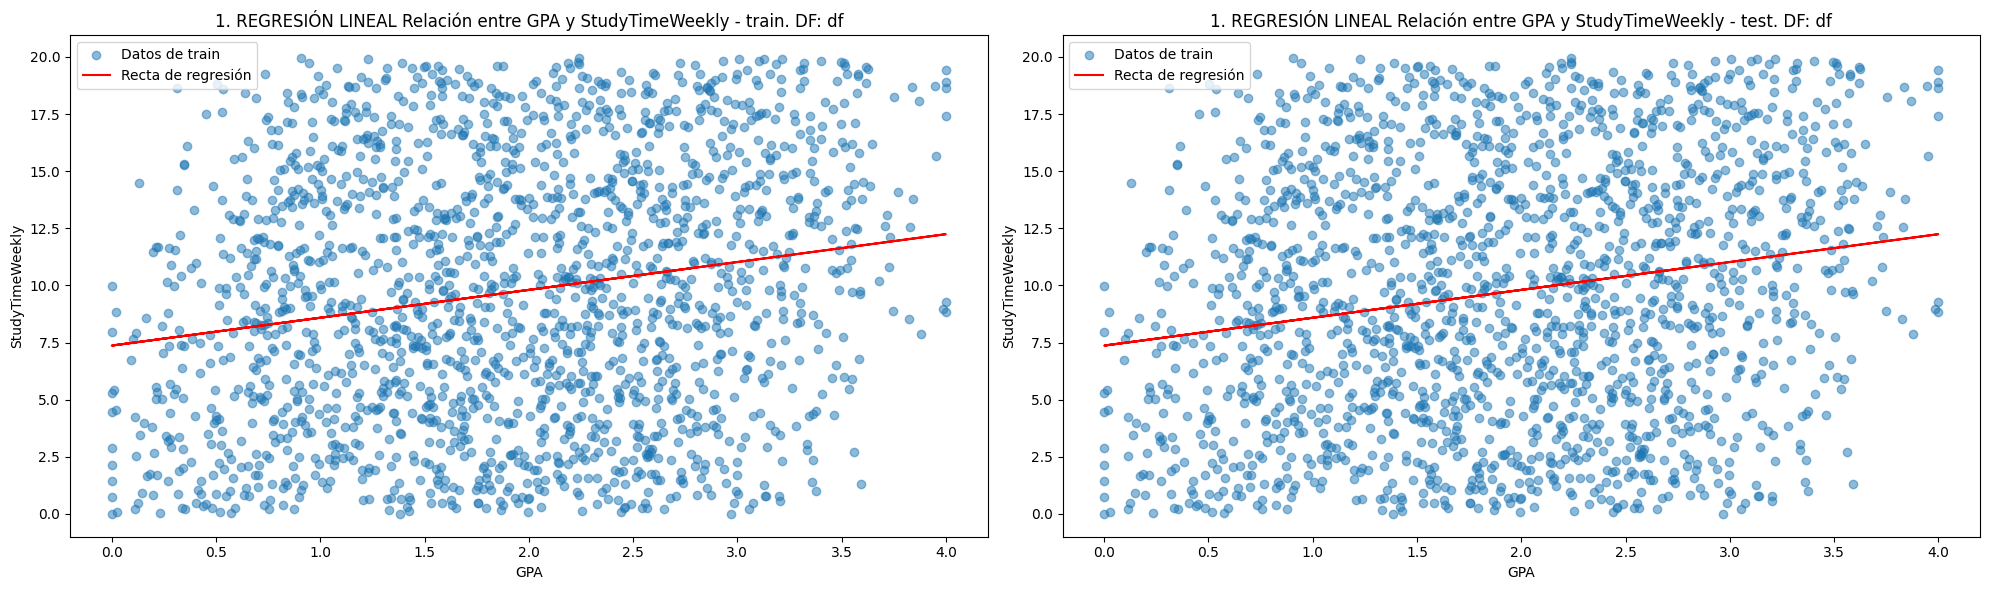

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


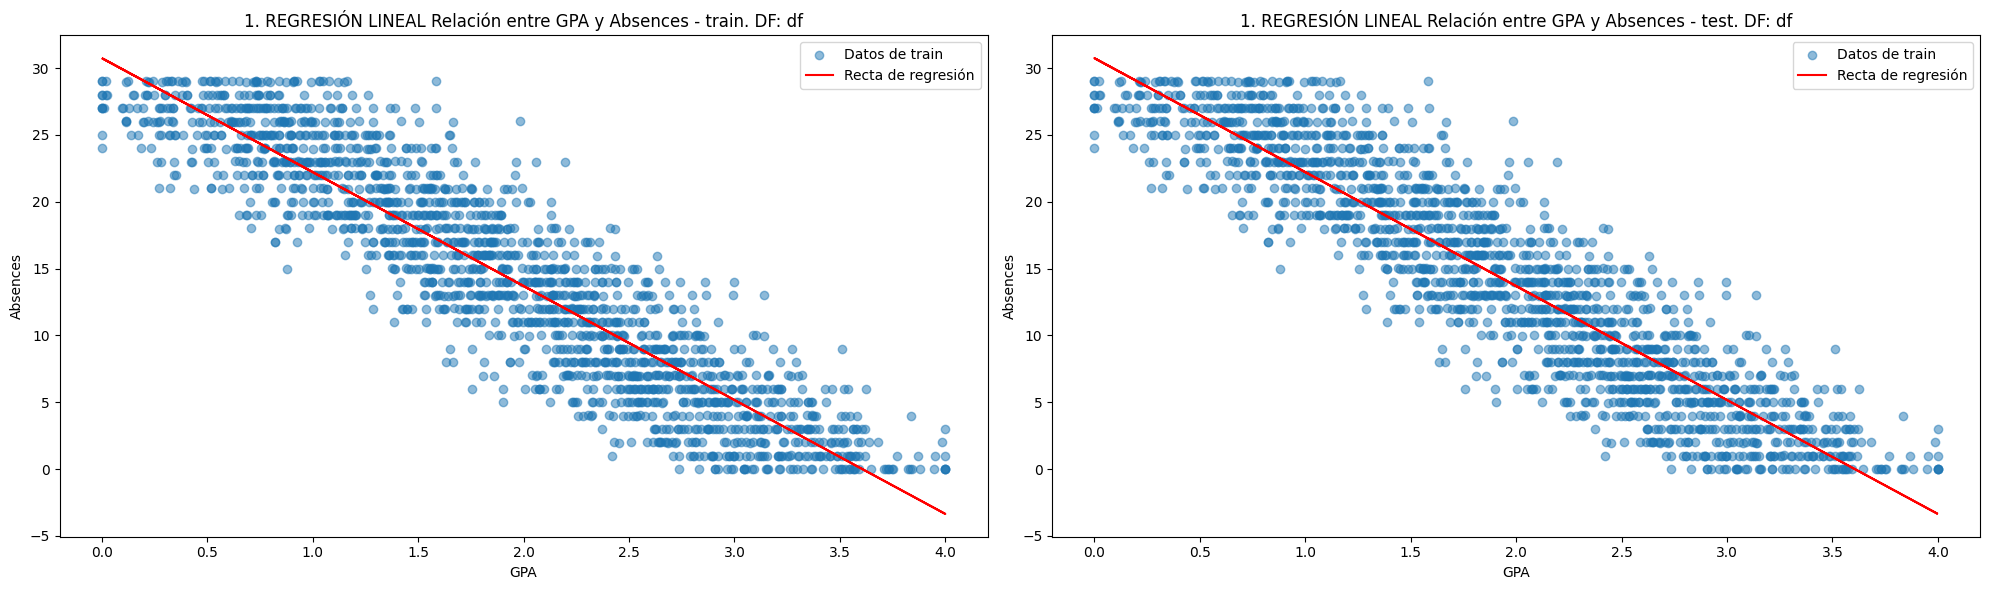

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')


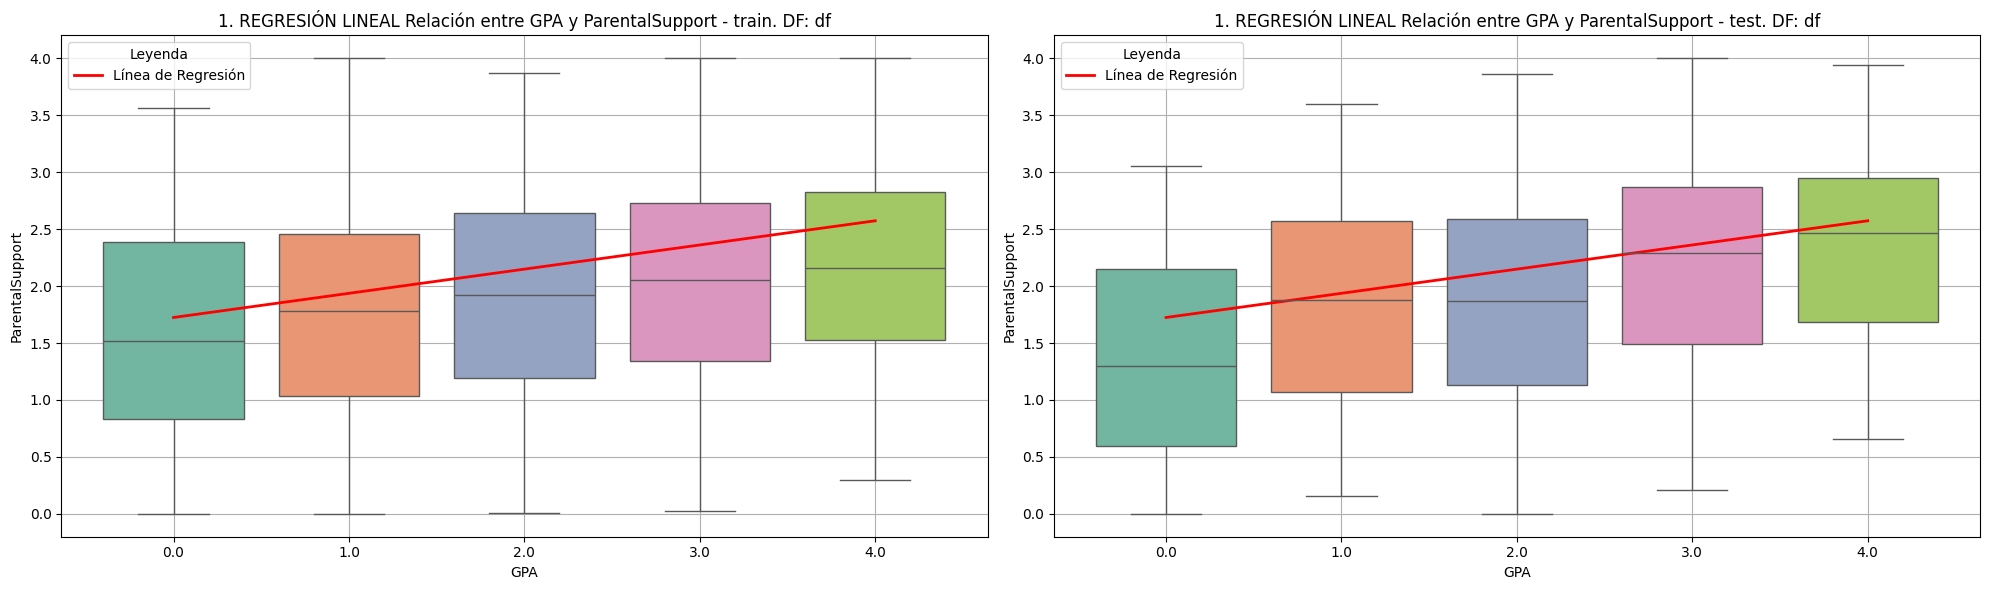

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


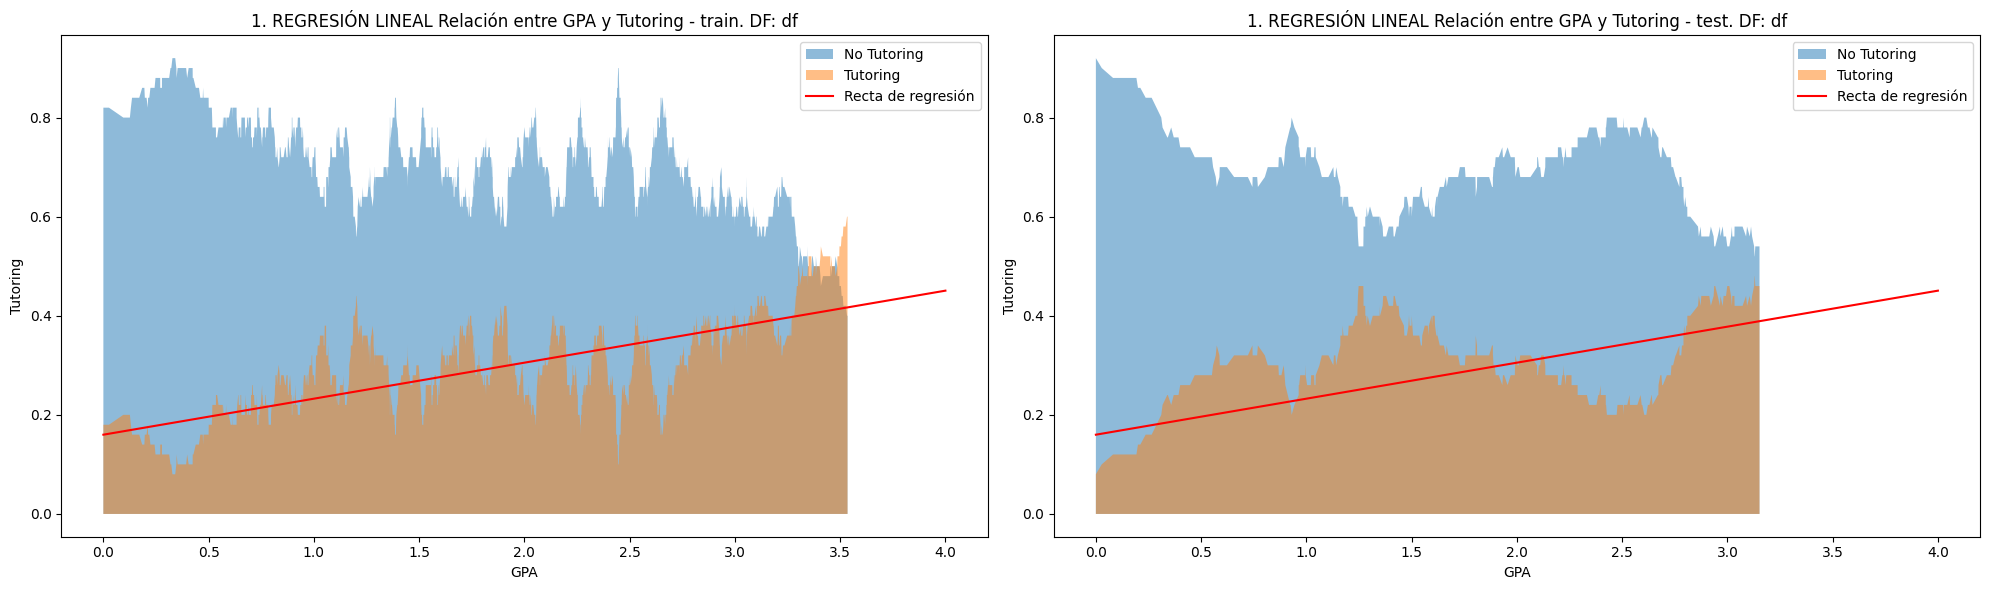

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


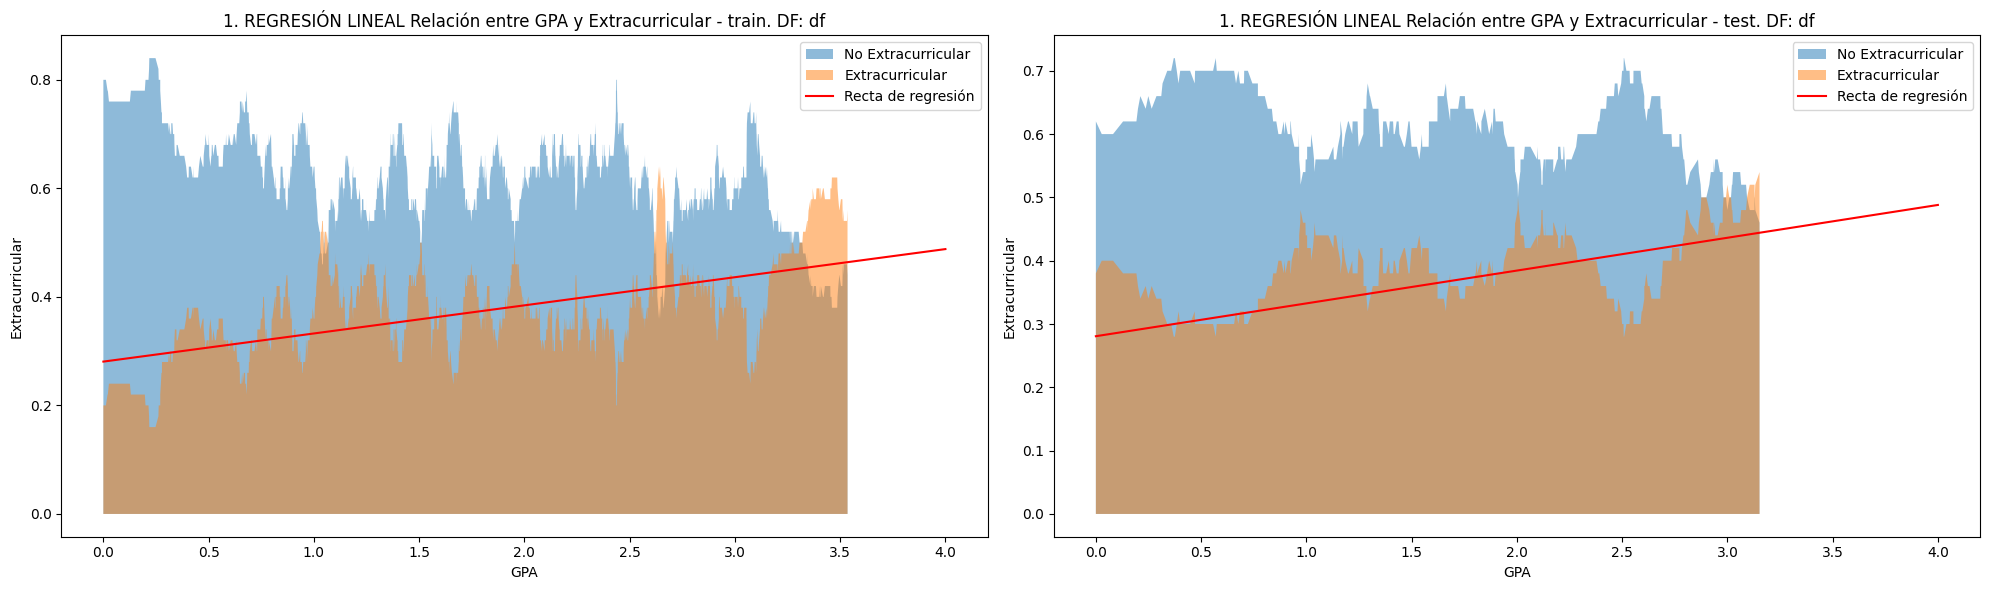

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


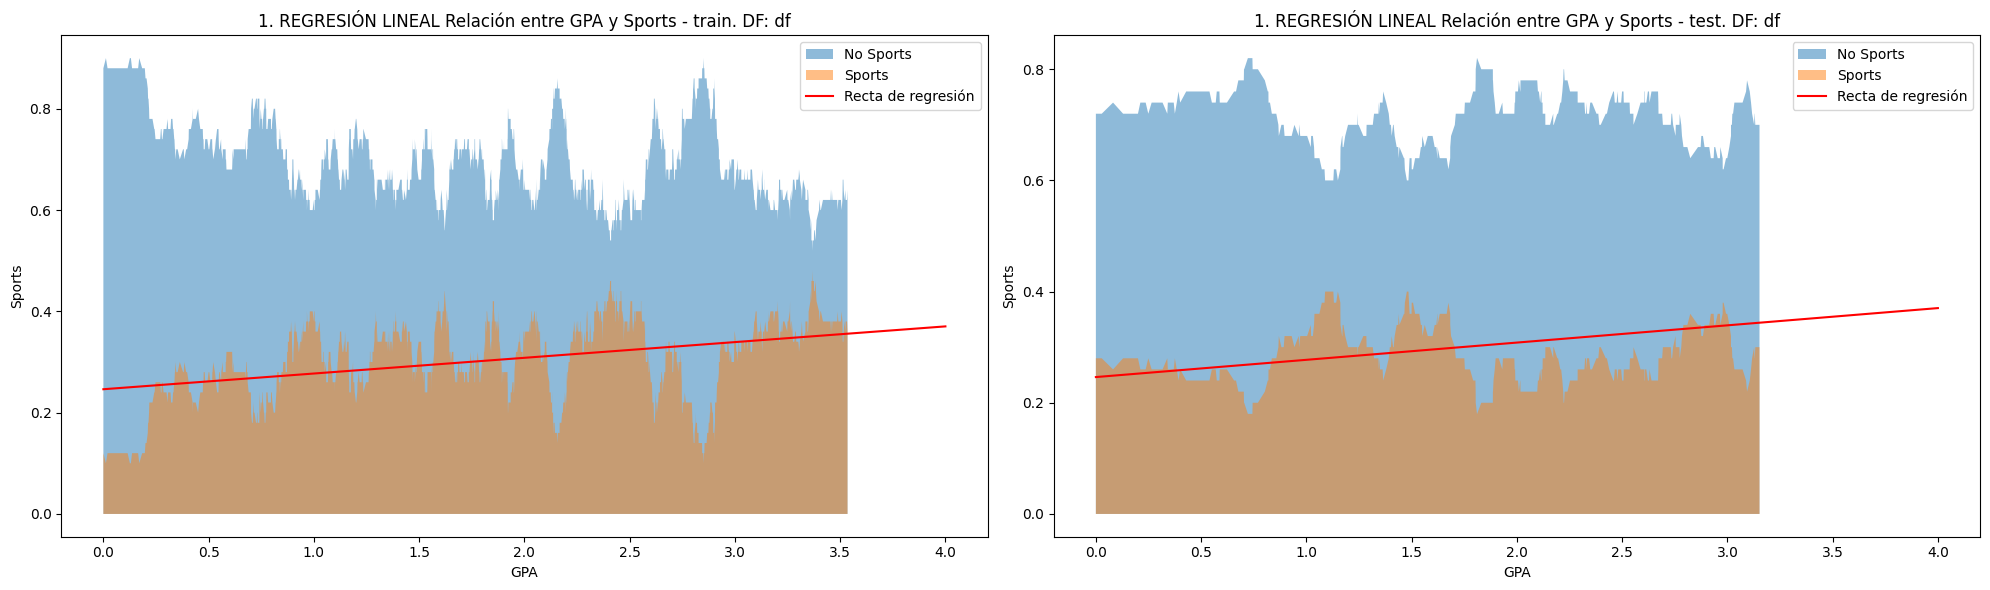

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


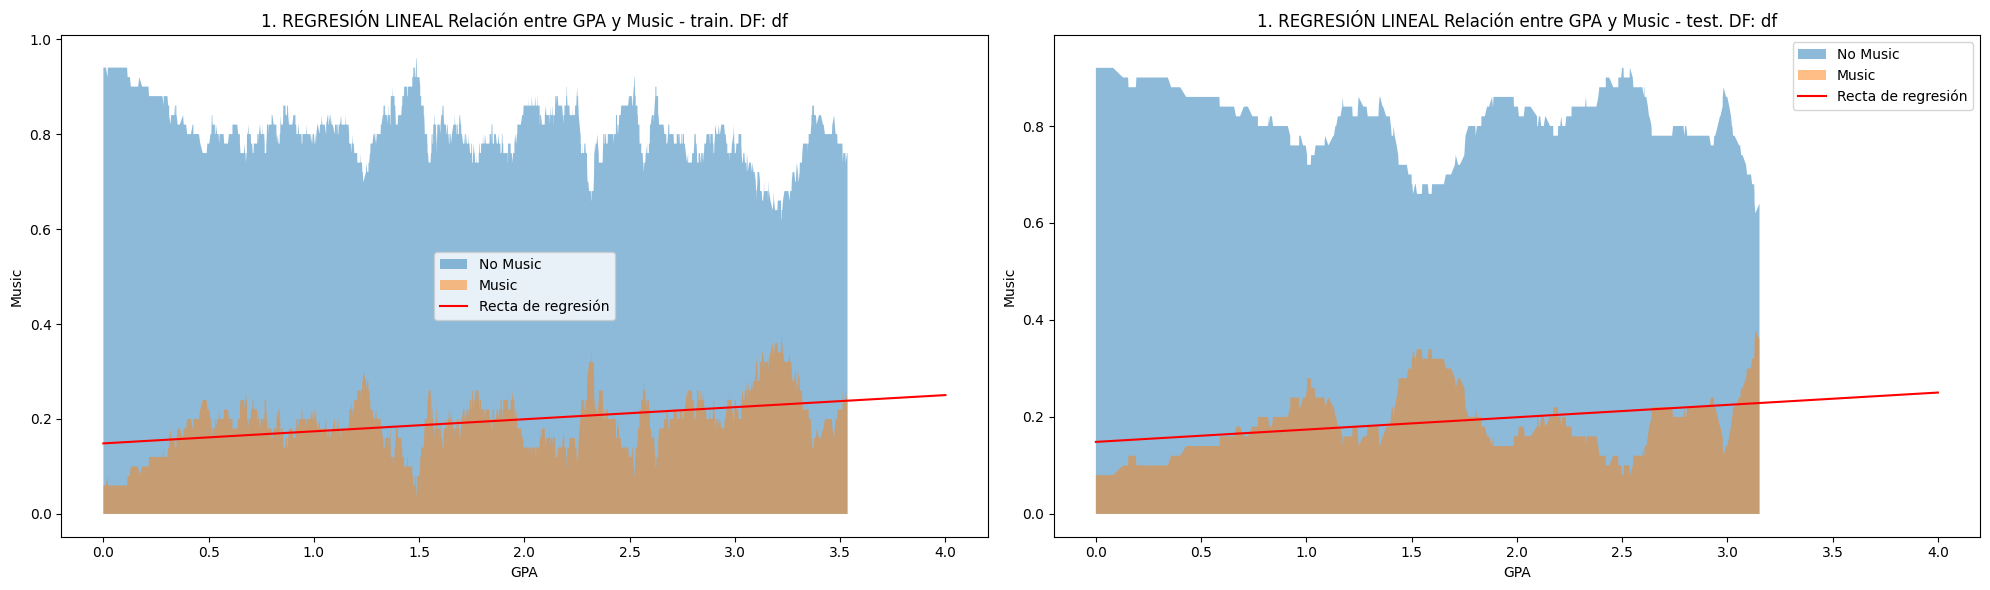

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


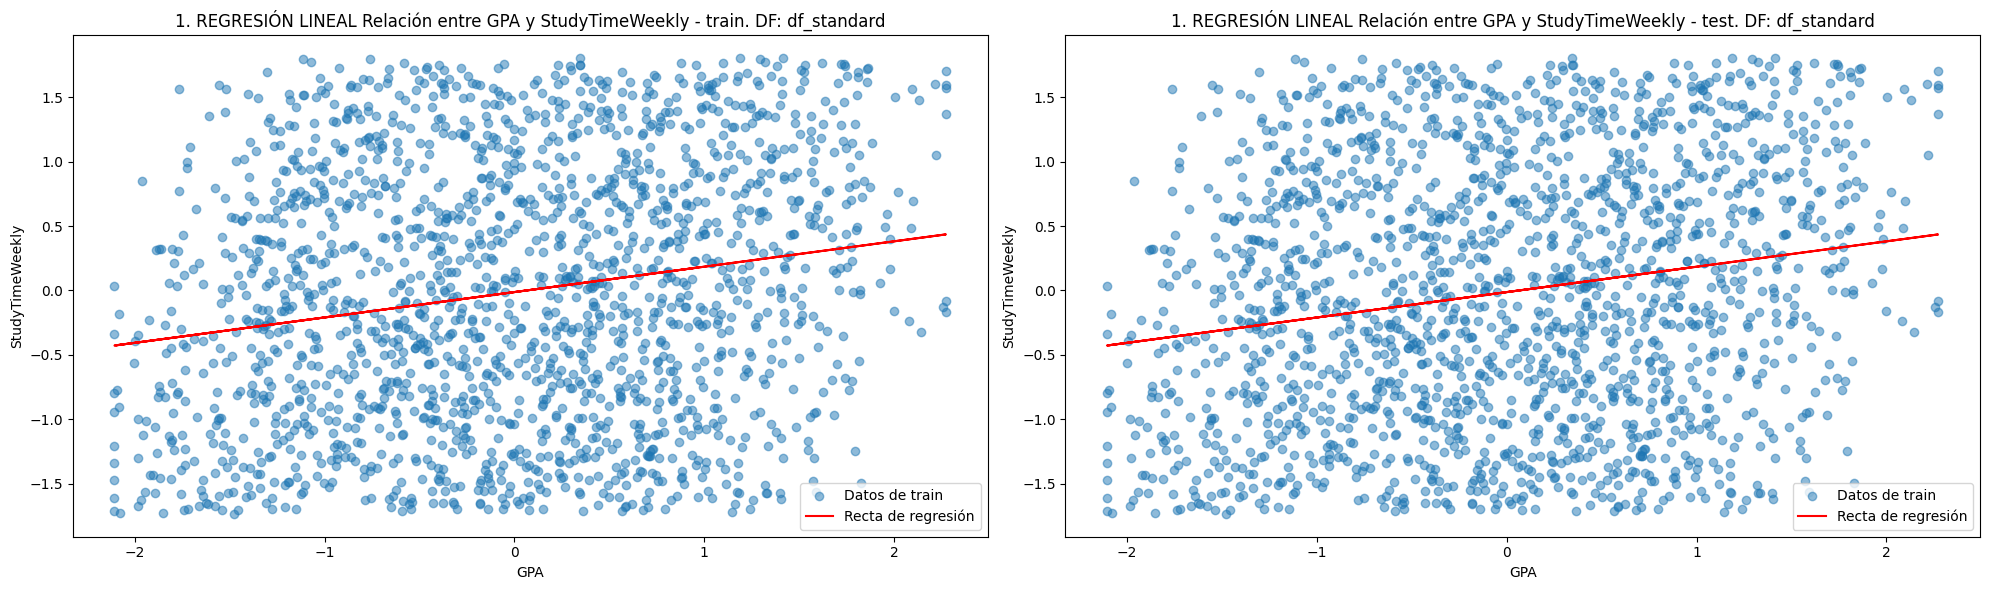

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


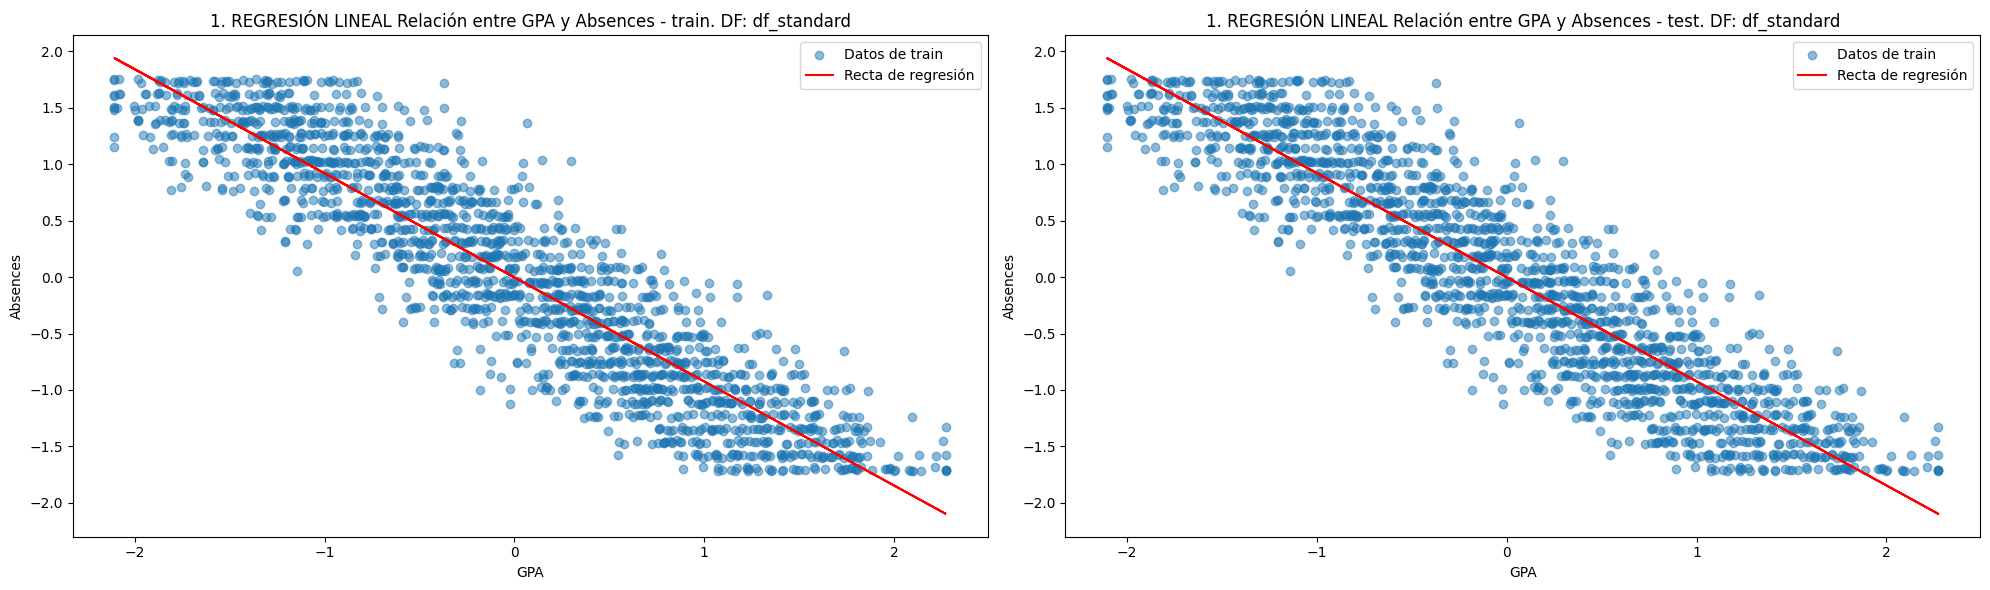

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')


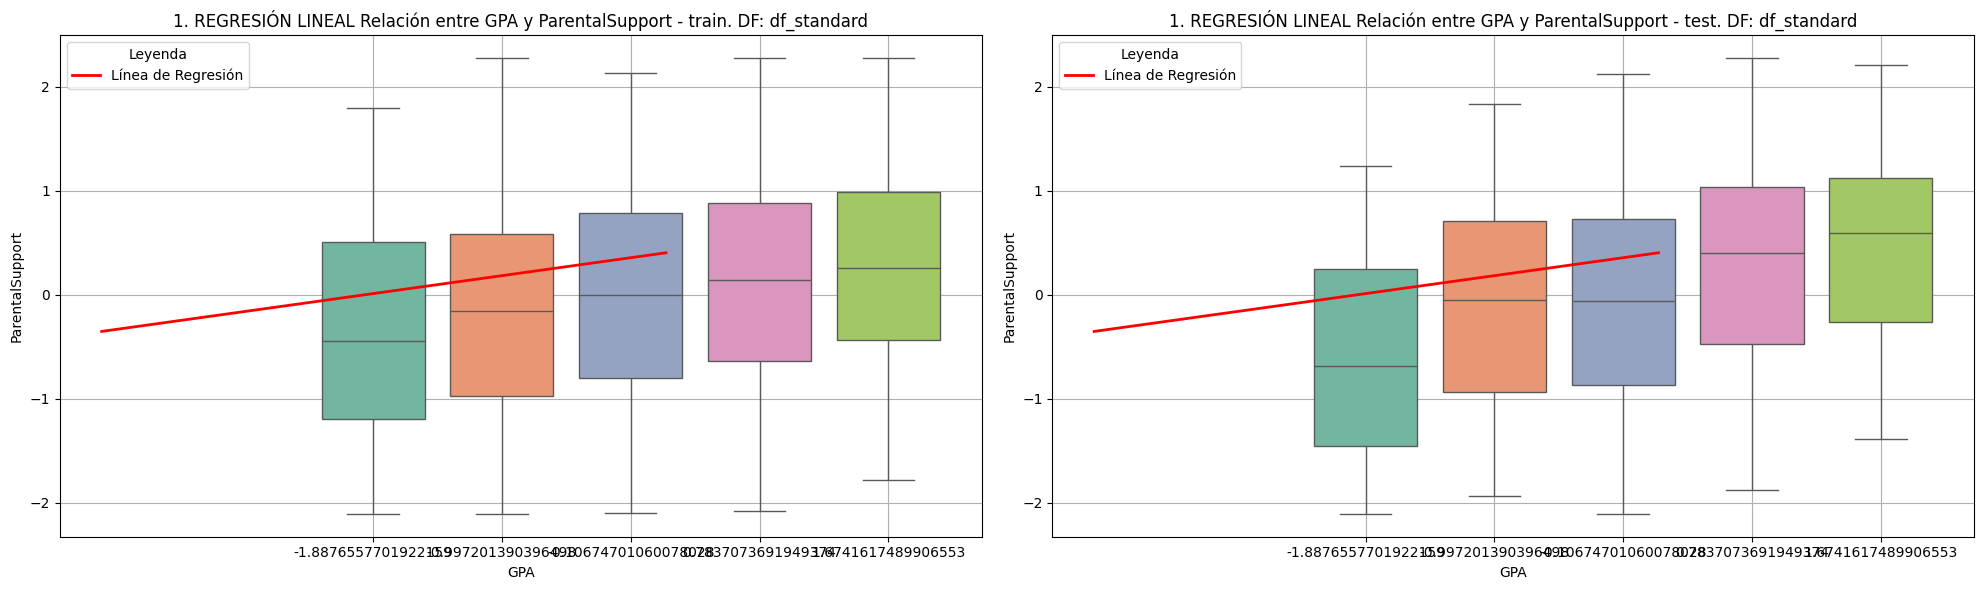

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


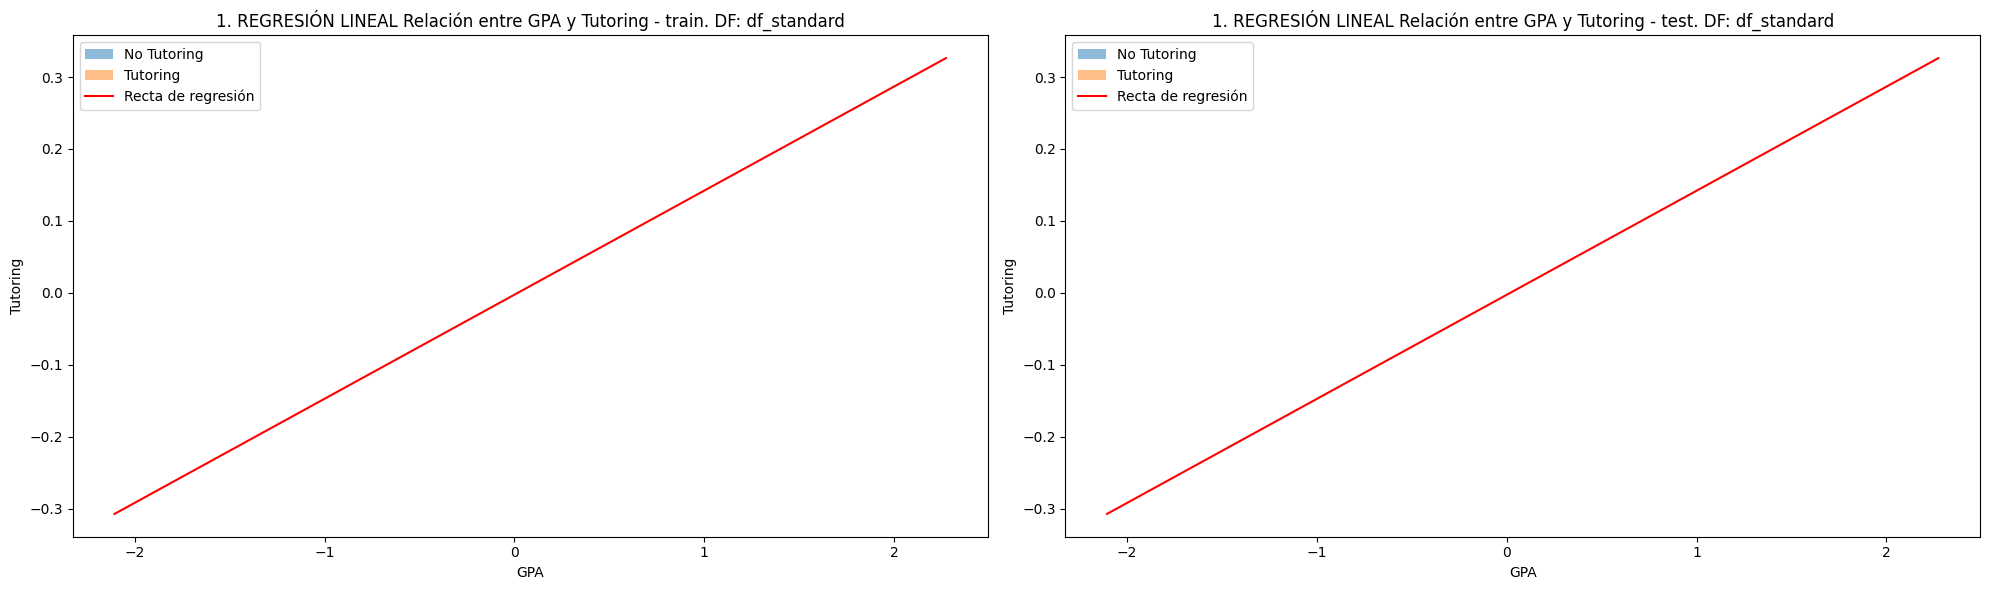

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


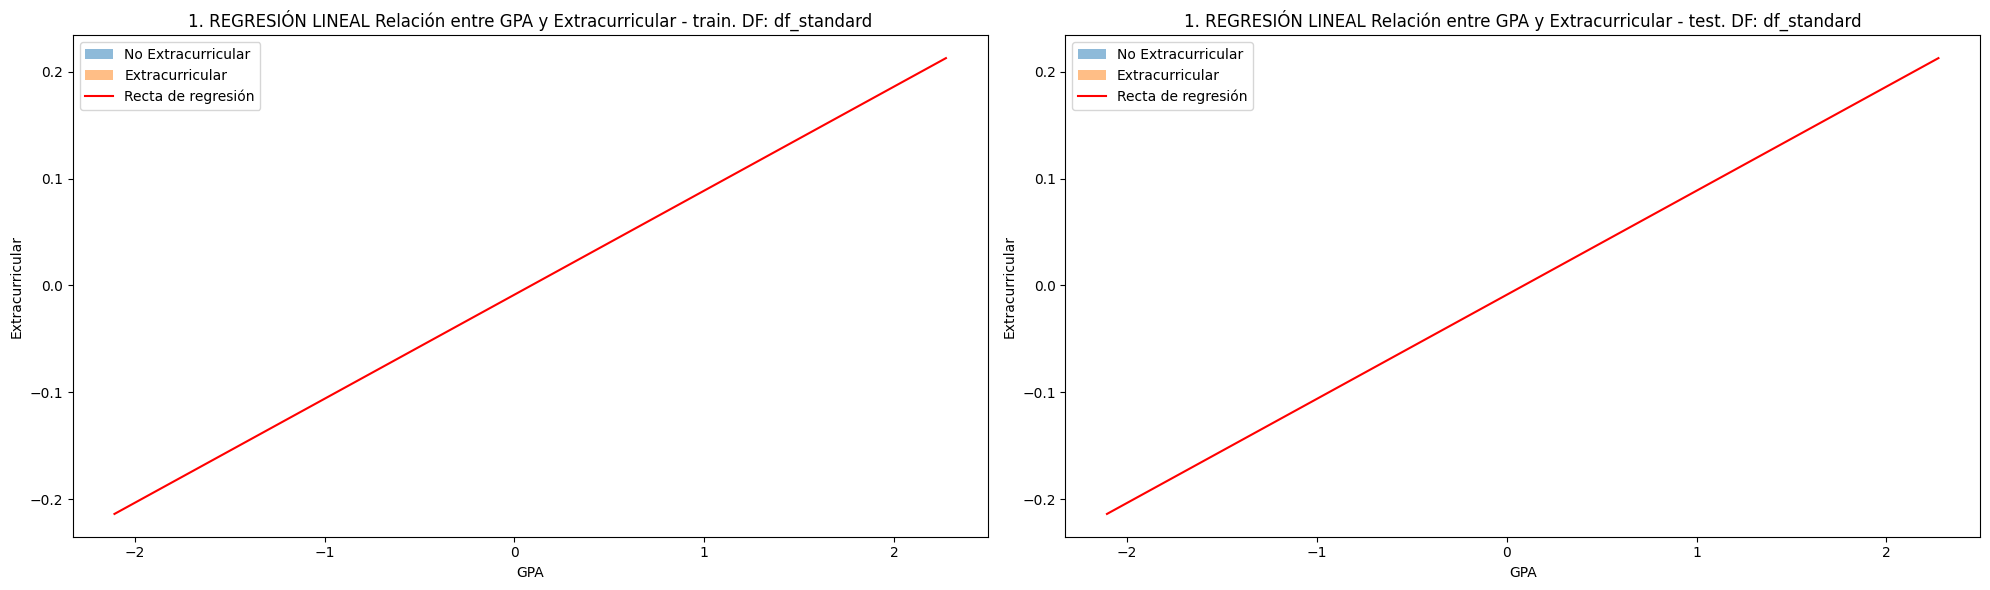

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


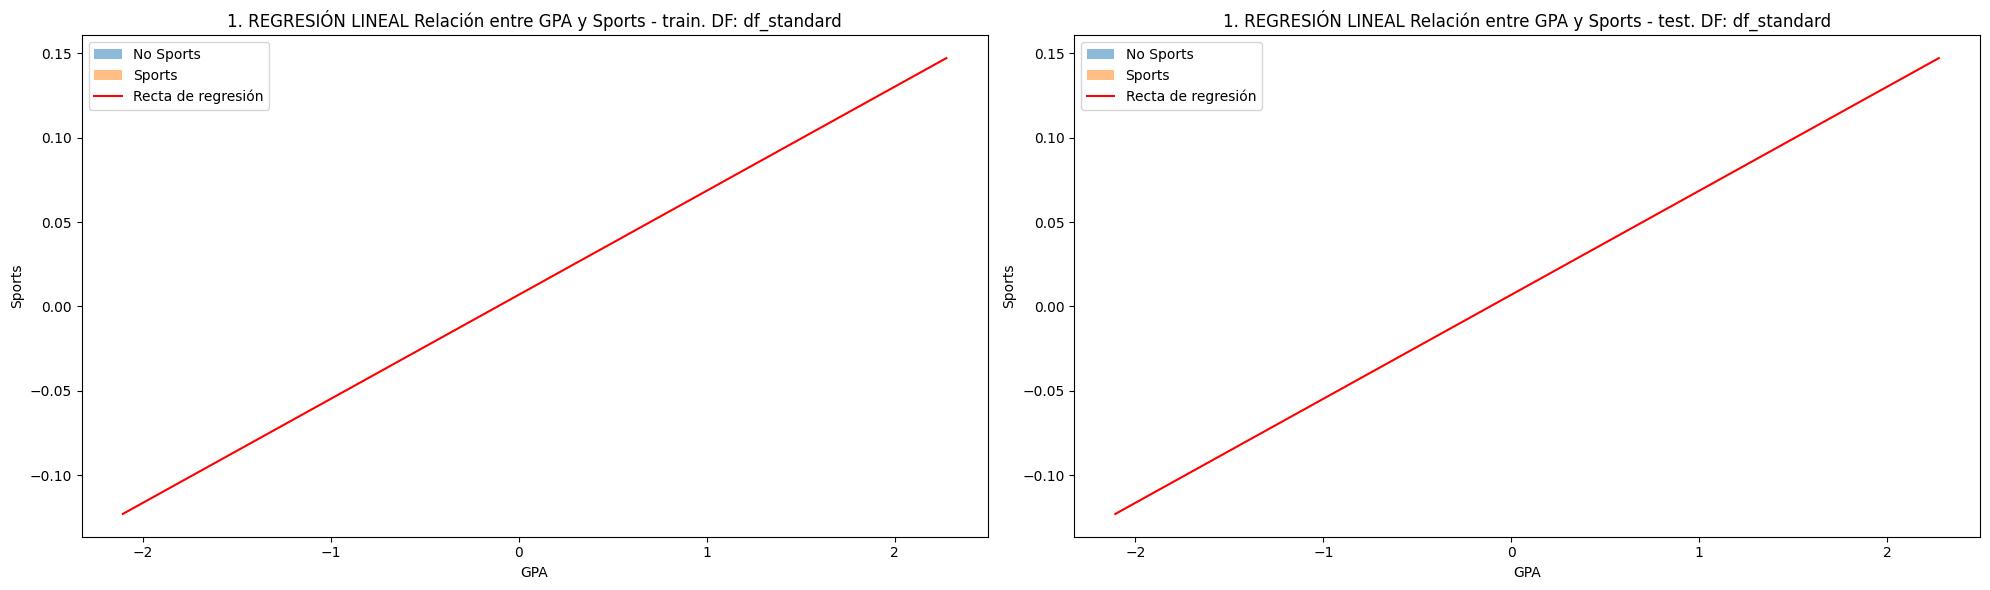

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


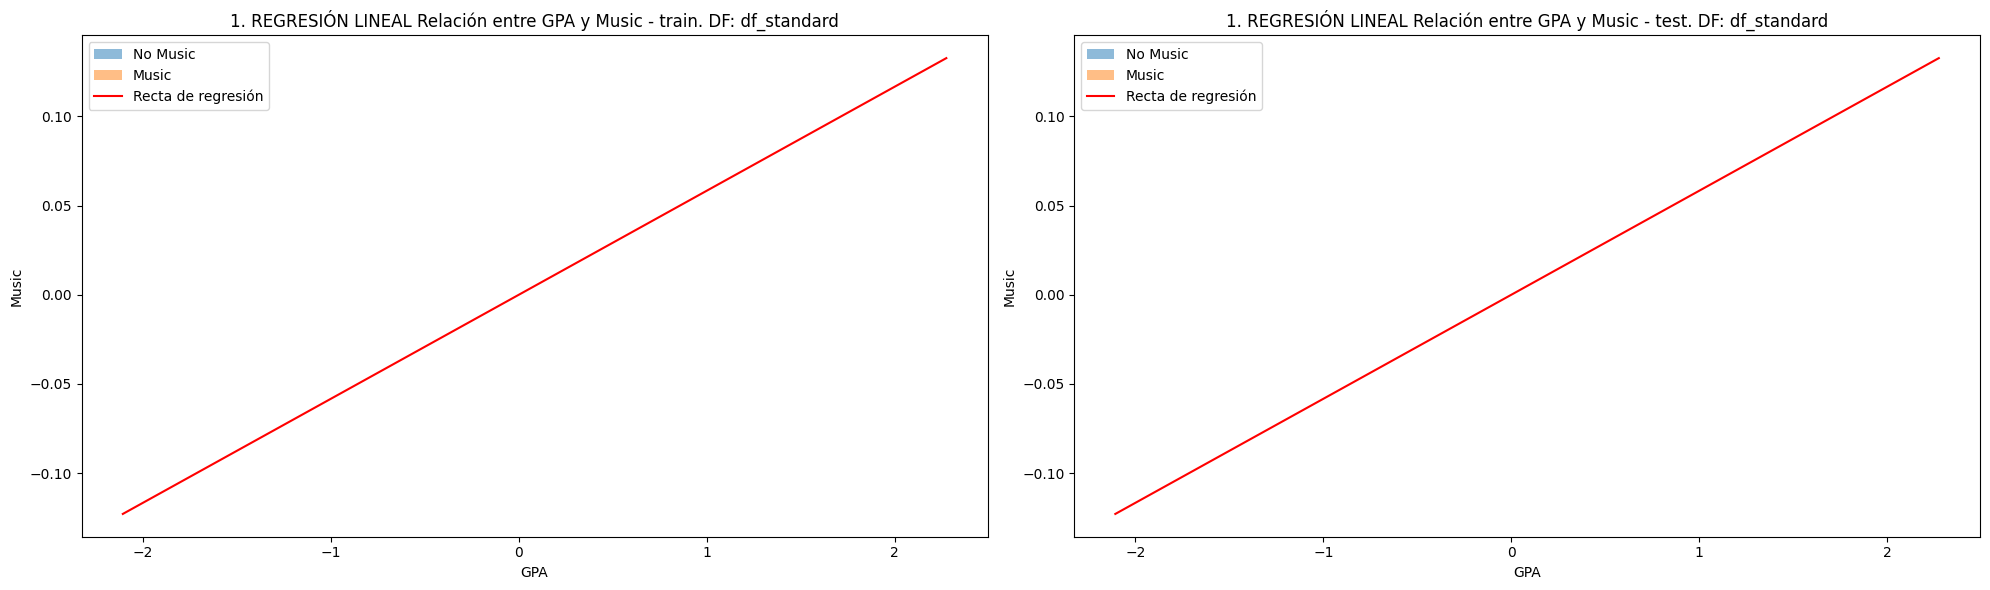

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


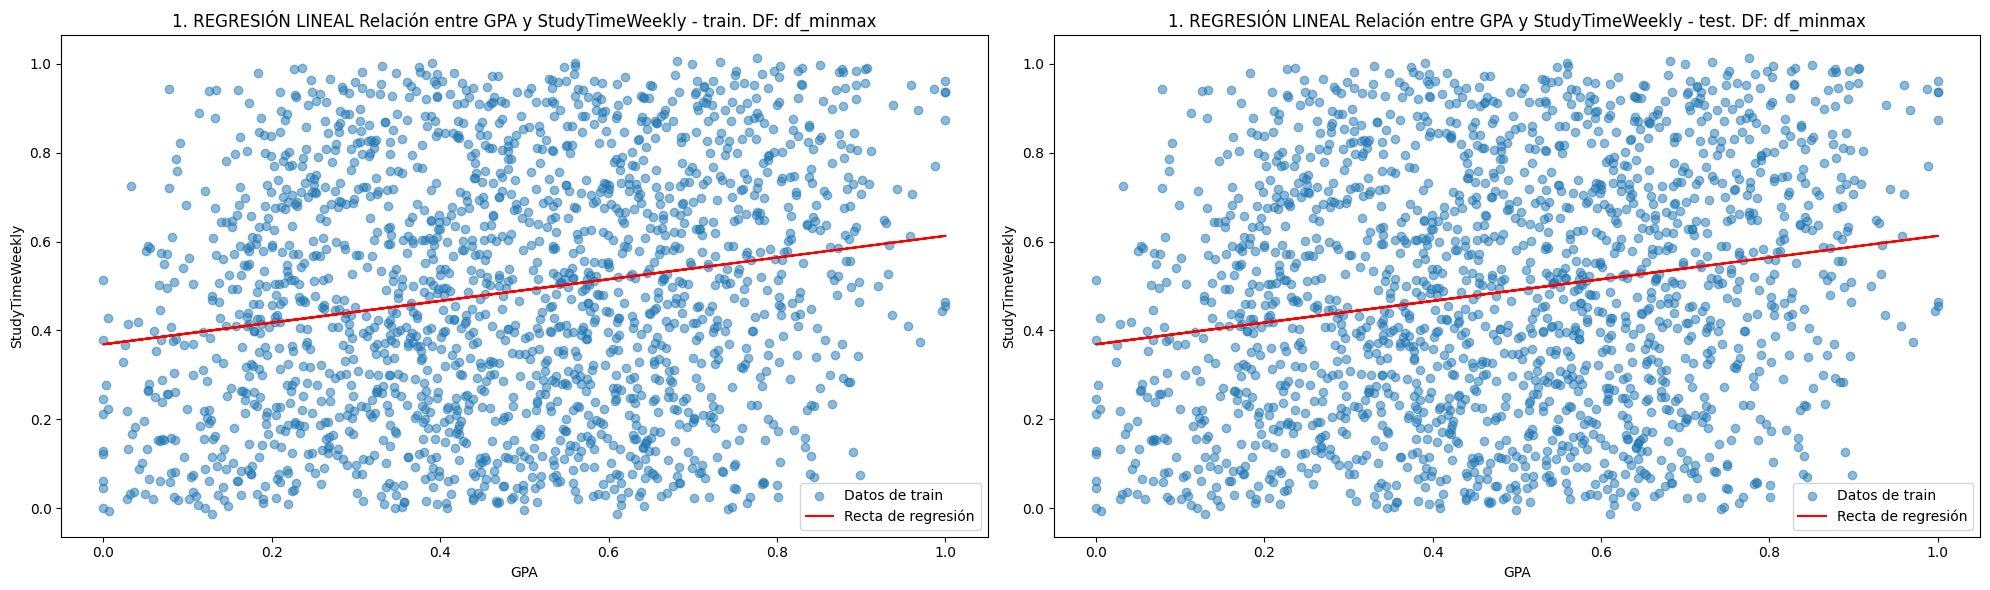

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


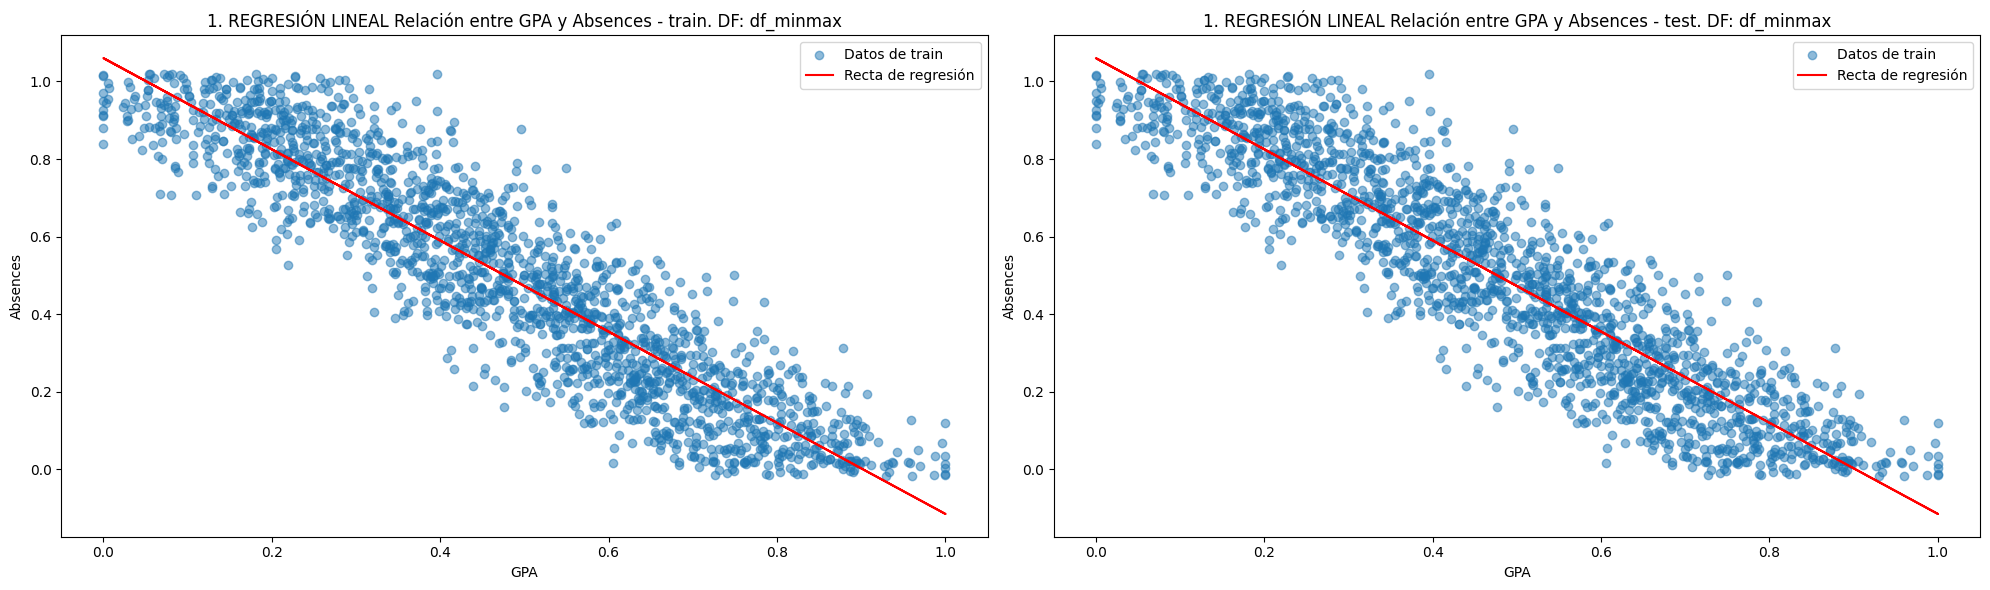

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')
/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_10641/4053879096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X.flatten(), ax=ax, palette='Set2')


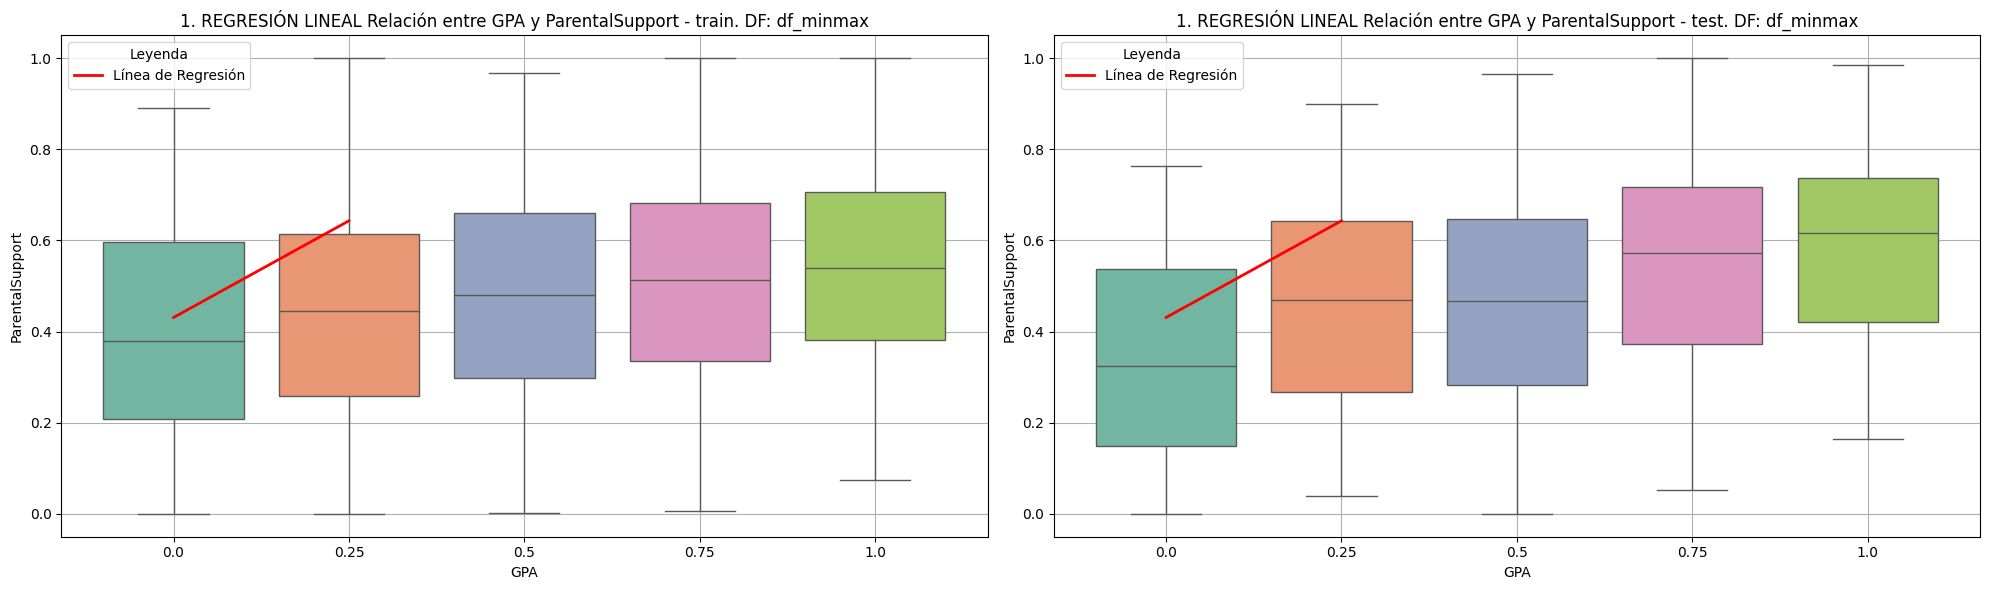

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


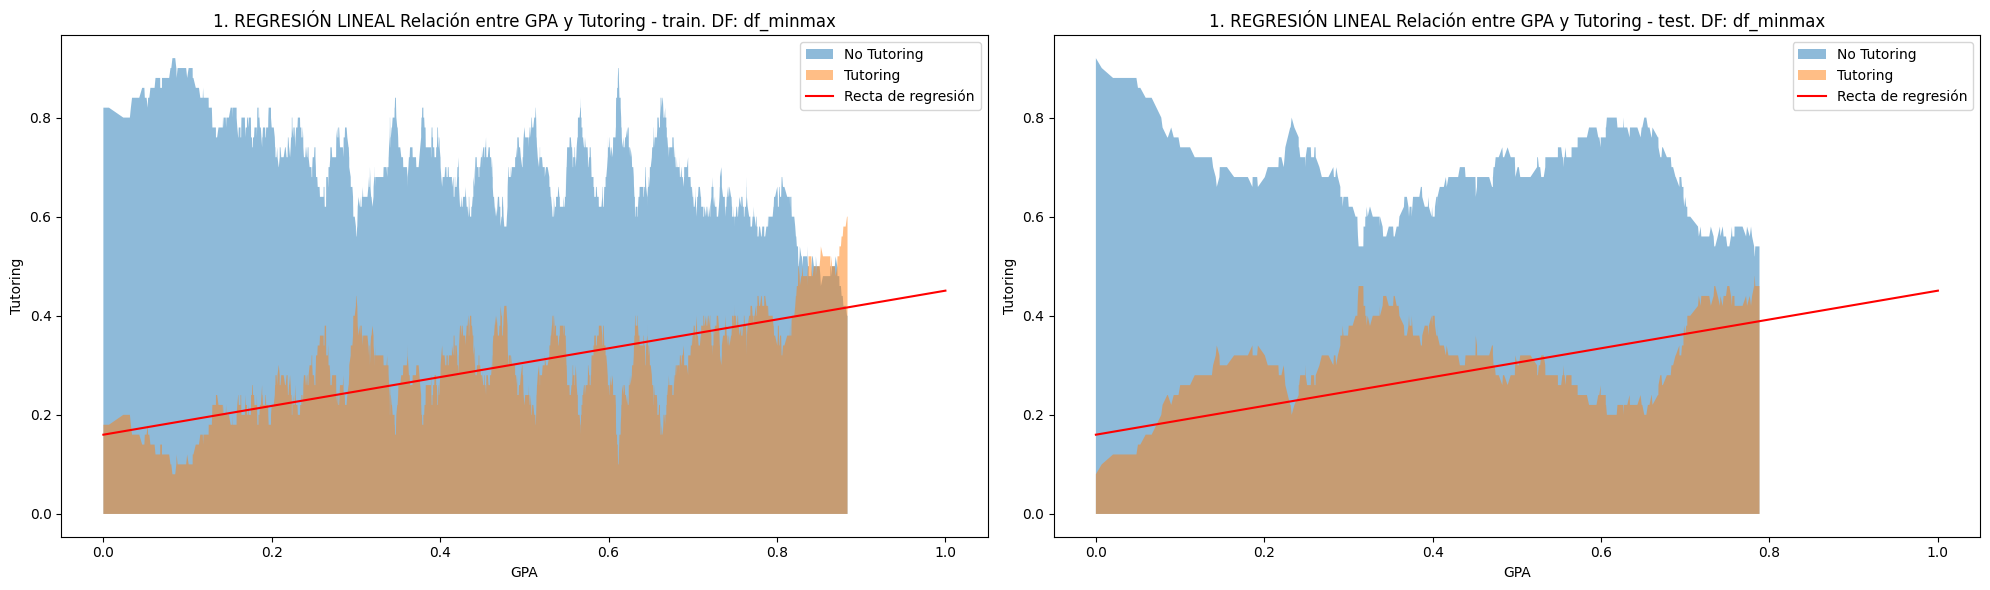

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


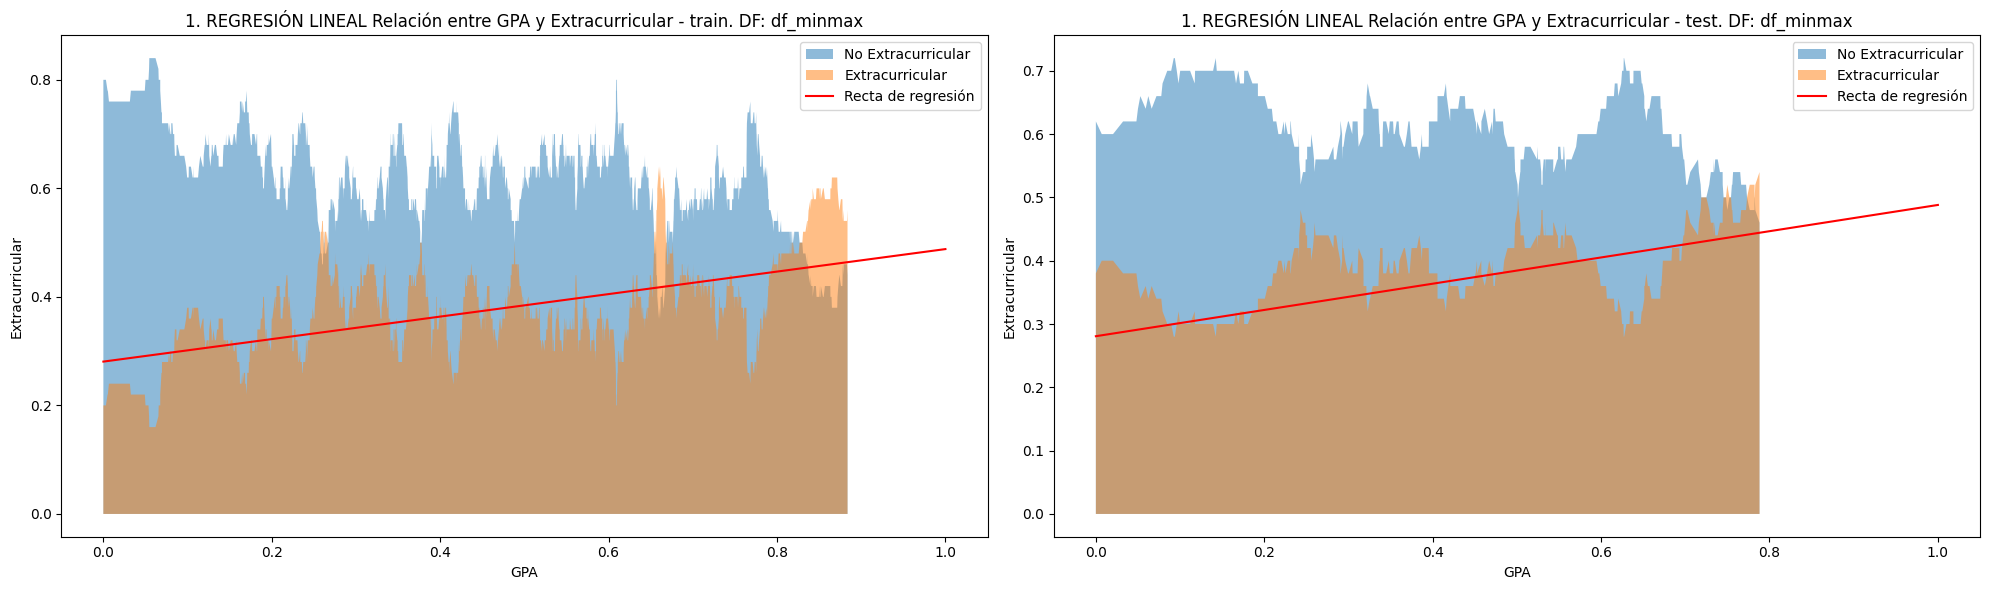

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


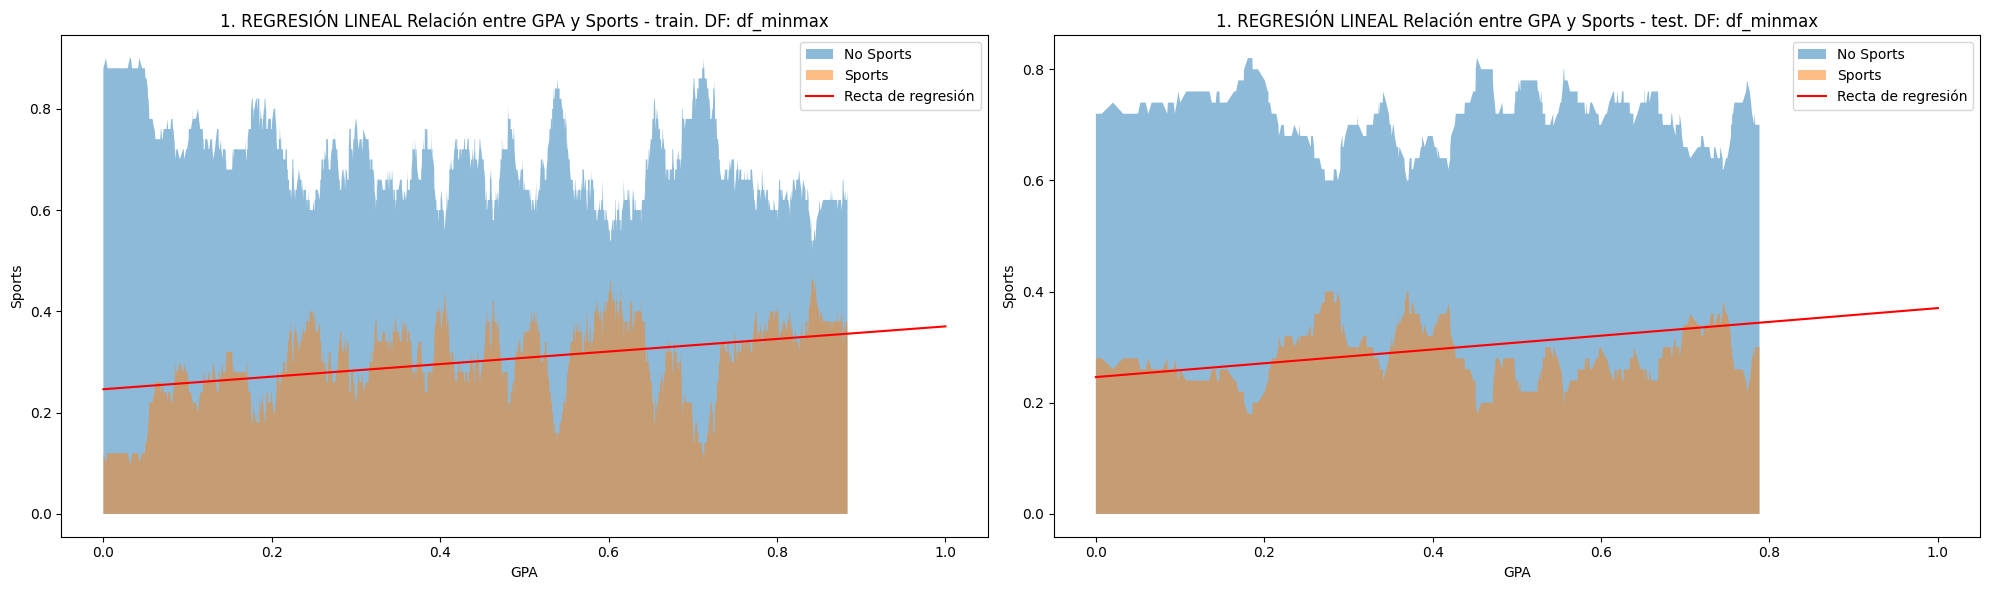

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


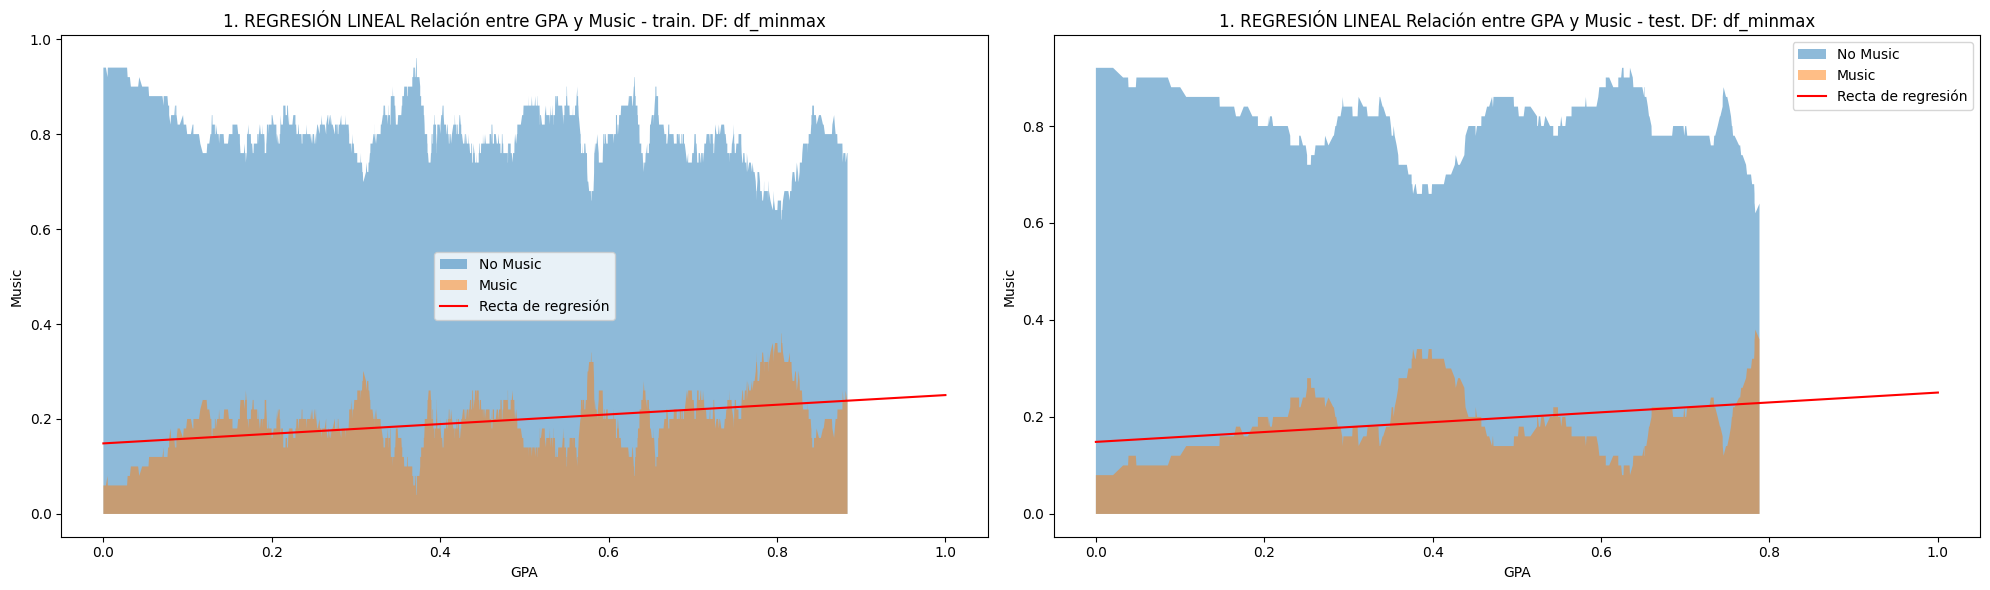

In [31]:
x_n = 'GPA'
variables = ["StudyTimeWeekly", "Absences", "ParentalSupport", "Tutoring", "Extracurricular", "Sports", "Music"]

dfs = [df, df_standard, df_minmax]

for y_n in variables:
    x = pd.Series(df[x_n])
    y = pd.Series(df[y_n])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=42)

    models = {'Regresión Lineal': regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n, nameof(df)),
    # 'Regresión Polinomica': regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n),
    # 'Regresión Neuronal': regresion_neuronal(x, y, x_n, str(y_n)),
    }
    comparison = compare_models(models)

for y_n in variables:
    x = pd.Series(df_standard[x_n])
    y = pd.Series(df_standard[y_n])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=42)

    models = {'Regresión Lineal': regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n, nameof(df_standard)),
    # 'Regresión Polinomica': regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n),
    # 'Regresión Neuronal': regresion_neuronal(x, y, x_n, str(y_n)),
    }
    comparison = compare_models(models)

for y_n in variables:
    x = pd.Series(df_minmax[x_n])
    y = pd.Series(df_minmax[y_n])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=42)

    models = {'Regresión Lineal': regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n, nameof(df_minmax)),
    # 'Regresión Polinomica': regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n),
    # 'Regresión Neuronal': regresion_neuronal(x, y, x_n, str(y_n)),
    }
    comparison = compare_models(models)

In [32]:
comparison

,Modelo,MSE,R2,MAE,RMSE,Predicciones
0,Regresión Lineal,0.157422,0.009691,0.31581,0.396764,"[[0.17586636226925118], [0.2046847344620363], ..."


In [33]:
# import random

# # Cargar una paleta de colores de seaborn
# palette = sns.color_palette("husl", n_colors=len(comparison))

# def get_color(index):
#     return palette[index]

# comparison = comparison.iloc[::-1]

# plt.figure(figsize=(14, 7))
# sns.scatterplot(data=df, x=x_n,  y=y_n, label='Datos originales')

# # Agregar las predicciones de cada modelo
# for index, row in comparison.iterrows():
#     Modelo = row['Modelo']
#     mse = row['MSE']
#     r2 = row['R2']
#     mae = row['MAE']
#     rmse = row['RMSE']
    
#     y_pred = row['Predicciones']
#     # plt.plot(x, y_pred, color=random_color(), label=f'{Modelo} (MSE: {mse:.2f}, R2: {r2:.2f})')
#     plt.plot(x, y_pred, color=get_color(index), label=f'{Modelo}')


# plt.title('Comparación de Modelos de Regresión')
# plt.xlabel('GPA')
# plt.ylabel('Absences')
# plt.legend()
# plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
# plt.show()

## **<u> Clasificación (Predecir una clase - binaria / multinomial) </u>**

### Regresión con Árbol de Decisión

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [35]:
def compare_models_class(model_dict):
    results = []
    confusion_matrices = {}

    for name, (confusion, exactitud, precision, sensibilidad, f1) in model_dict.items():
        stats = [name, exactitud, precision, sensibilidad, f1]
        results.append(stats)
        confusion_matrices[name] = confusion    

    df_results = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    return df_results, confusion_matrices

def gen_graph_class(df_metricas):

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))

    sns.barplot(x='Modelo', y='Accuracy', data=df_metricas, ax=ax[0, 0])
    ax[0, 0].set_title('Exactitud')

    sns.barplot(x='Modelo', y='Precision', data=df_metricas, ax=ax[0, 1])
    ax[0, 1].set_title('Precision')

    sns.barplot(x='Modelo', y='Recall', data=df_metricas, ax=ax[1, 0])
    ax[1, 0].set_title('Recall')

    sns.barplot(x='Modelo', y='F1 Score', data=df_metricas, ax=ax[1, 1])
    ax[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.savefig('./graph/Modelos de Clasificacion.png')
    plt.show()

def gen_confusion_matrix(confusion_matrices):
    for model_name, confusion in confusion_matrices.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'./graph/Matriz de Confusión - {model_name}.png')
        plt.show()

In [36]:
def random_forest(X_train, X_test, y_train, y_test):
    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [37]:
def maquina_vectores_soporte(X_train, X_test, y_train, y_test):
    modelo = SVC()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [38]:
def arbol_decision(X_train, X_test, y_train, y_test):
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def red_neuronal_clasificacion(X_train, X_test, y_train, y_test):
    # Determinar el número de clases a partir de los datos
    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]
    
    # Convertir etiquetas a formato categórico (one-hot encoding)
    y_train_cat = to_categorical(y_train, num_classes=num_classes)
    y_test_cat = to_categorical(y_test, num_classes=num_classes)
    
    # Crear el modelo
    modelo = Sequential()
    modelo.add(Dense(64, input_dim=input_dim, activation='relu'))  # Capa oculta con 64 neuronas
    modelo.add(Dense(64, activation='relu'))  # Otra capa oculta con 64 neuronas
    modelo.add(Dense(num_classes, activation='softmax'))  # Capa de salida

    # Compilar el modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, y_train_cat, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

    # Hacer predicciones
    y_pred_cat = modelo.predict(X_test)
    y_pred = y_pred_cat.argmax(axis=1)  # Convertir one-hot encoding a etiquetas

    # Calcular métricas
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return confusion, exactitud, precision, sensibilidad, f1


In [40]:
def regresión_logistica(X_train, X_test, y_train, y_test):
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [41]:
def k_nearest(X_train, X_test, y_train, y_test):
    modelo = KNeighborsClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [42]:
def naive_bayes(X_train, X_test, y_train, y_test):
    modelo = GaussianNB()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [43]:
x_n = 'ParentalEducation'
y_n = 'GradeClass'

X = df[[x_n]].values
y = df[y_n].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': random_forest(X_train, X_test, y_train, y_test),
    'Máquina de Vectores de Soporte': maquina_vectores_soporte(X_train, X_test, y_train, y_test),
    'Árbol de Decisión': arbol_decision(X_train, X_test, y_train, y_test),
    'Red Neuronal' : red_neuronal_clasificacion(X_train, X_test, y_train, y_test),
    'Regresión Logística': regresión_logistica(X_train, X_test, y_train, y_test),
    'K-Nearest Neighbors': k_nearest(X_train, X_test, y_train, y_test),
    'Naive Bayes': naive_bayes(X_train, X_test, y_train, y_test)
}

comparison, confusion_matrices = compare_models_class(models)
gen_graph_class(comparison)
gen_confusion_matrix(confusion_matrices)
comparison

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.